
<font size = "13"><span style="color:#EFE1D1">
(づ￣ 3￣)づ Scaling Methods with Pyspark
</span></font>

In [137]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(style="whitegrid")

In [138]:
spark = SparkSession.builder.getOrCreate()



<font size = "13"><span style="color:#EFE1D1">
( ﾉ ﾟｰﾟ)ﾉ Iris Sepal Length 
</span></font>

In [139]:
spark_iris_data = spark.read.csv('Iris.csv', header=True, inferSchema=True).select('SepalLengthCm')
spark_iris_data.show()

+-------------+
|SepalLengthCm|
+-------------+
|          5.1|
|          4.9|
|          4.7|
|          4.6|
|          5.0|
|          5.4|
|          4.6|
|          5.0|
|          4.4|
|          4.9|
|          5.4|
|          4.8|
|          4.8|
|          4.3|
|          5.8|
|          5.7|
|          5.4|
|          5.1|
|          5.7|
|          5.1|
+-------------+
only showing top 20 rows



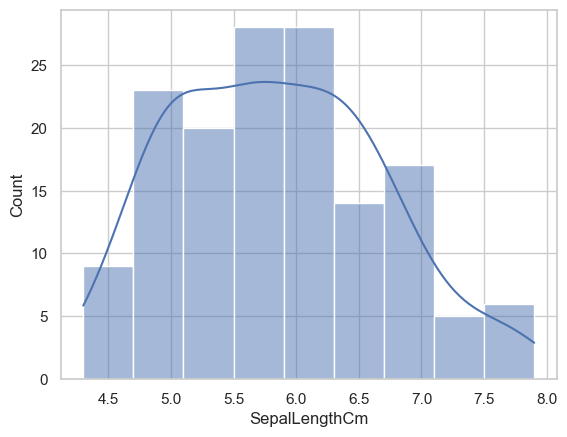

In [140]:
sns.histplot(x='SepalLengthCm', data=spark_iris_data.toPandas(), kde=True)
plt.show()


In [142]:
def reinit_data():
    spark_iris_copy = spark_iris_data.alias('spark_iris_copy')
    num_assembler = VectorAssembler()\
        .setInputCols(['SepalLengthCm'])\
        .setOutputCol('features')

    spark_iris_copy = num_assembler.transform(spark_iris_data)

    return spark_iris_copy

spark_iris_copy = reinit_data()
spark_iris_copy.show()

+-------------+--------+
|SepalLengthCm|features|
+-------------+--------+
|          5.1|   [5.1]|
|          4.9|   [4.9]|
|          4.7|   [4.7]|
|          4.6|   [4.6]|
|          5.0|   [5.0]|
|          5.4|   [5.4]|
|          4.6|   [4.6]|
|          5.0|   [5.0]|
|          4.4|   [4.4]|
|          4.9|   [4.9]|
|          5.4|   [5.4]|
|          4.8|   [4.8]|
|          4.8|   [4.8]|
|          4.3|   [4.3]|
|          5.8|   [5.8]|
|          5.7|   [5.7]|
|          5.4|   [5.4]|
|          5.1|   [5.1]|
|          5.7|   [5.7]|
|          5.1|   [5.1]|
+-------------+--------+
only showing top 20 rows




<font size = "13"><span style="color:#EFE1D1">
( ﾉ ﾟｰﾟ)ﾉ StandardScaler with Mean and Standard Deviation
</span></font>

In [143]:
from pyspark.ml.feature import StandardScaler

standard_scaler_with_mean_and_std = StandardScaler(
    withStd=True, withMean=True)\
    .setInputCol('features')\
    .setOutputCol('featuresScaled')

standard_scaler = standard_scaler_with_mean_and_std.fit(spark_iris_copy)
standardized_data = standard_scaler.transform(spark_iris_copy).select('features', 'featuresScaled')
standardized_data.select('featuresScaled').show(truncate=False)

+----------------------+
|featuresScaled        |
+----------------------+
|[-0.8976738791967643] |
|[-1.1392004834649512] |
|[-1.3807270877331392] |
|[-1.5014903898672336] |
|[-1.0184371813308577] |
|[-0.5353839727944818] |
|[-1.5014903898672336] |
|[-1.0184371813308577] |
|[-1.7430169941354205] |
|[-1.1392004834649512] |
|[-0.5353839727944818] |
|[-1.2599637855990458] |
|[-1.2599637855990458] |
|[-1.8637802962695151] |
|[-0.05233076425810695]|
|[-0.1730940663922004] |
|[-0.5353839727944818] |
|[-0.8976738791967643] |
|[-0.1730940663922004] |
|[-0.8976738791967643] |
+----------------------+
only showing top 20 rows



In [144]:
def collect_data(data):
    features_list = []
    featuresScaled_list = []
    for i in range(len(data.collect())):
        features_list.append(data.collect()[i].features[0])
        featuresScaled_list.append(data.collect()[i].featuresScaled[0])
    df = pd.DataFrame({'features': features_list, 'featuresScaled': featuresScaled_list})
    return df

def visualize_data(df):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    sns.histplot(x='features', data=df, kde=True, ax=ax[0])
    sns.histplot(x='featuresScaled', data=df, kde=True, ax=ax[1], color='orange')
    plt.show()

In [145]:
df = collect_data(standardized_data)

In [146]:
df.head()

,features,featuresScaled
0,5.1,-0.897674
1,4.9,-1.139200
2,4.7,-1.380727
3,4.6,-1.501490
4,5.0,-1.018437


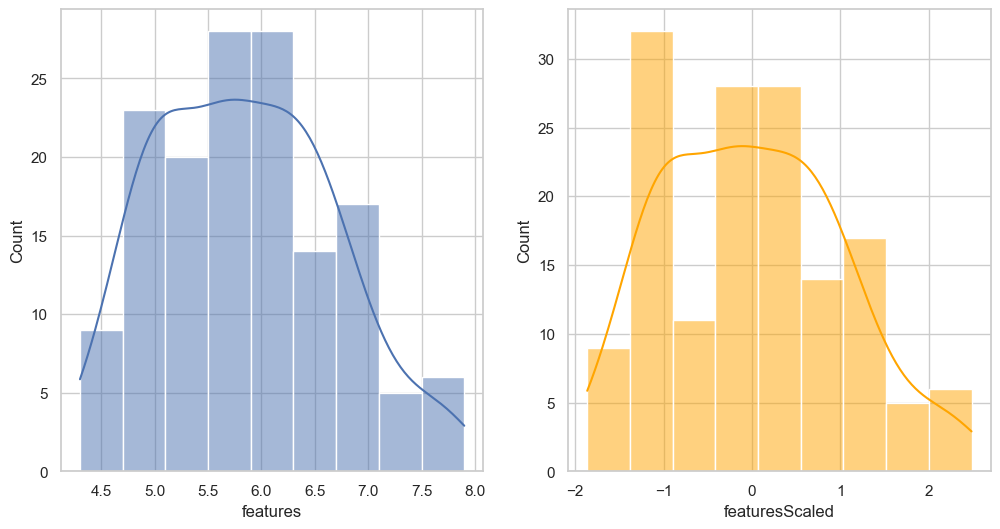

In [147]:
visualize_data(df)



<font size = "13"><span style="color:#EFE1D1">
( ﾉ ﾟｰﾟ)ﾉ StandardScaler with only Standard Deviation
</span></font>

In [152]:
spark_iris_copy = reinit_data()

standard_scaler_std = StandardScaler(
    withStd=True, withMean=False)\
    .setInputCol('features')\
    .setOutputCol('featuresScaled')

standard_scaler = standard_scaler_std.fit(spark_iris_copy)
standardized_data = standard_scaler.transform(spark_iris_copy).select('features', 'featuresScaled')
standardized_data.select('featuresScaled').show(truncate=False)

+--------------------+
|featuresScaled      |
+--------------------+
|[6.158928408838787] |
|[5.9174018045706]   |
|[5.675875200302412] |
|[5.555111898168318] |
|[6.038165106704694] |
|[6.52121831524107]  |
|[5.555111898168318] |
|[6.038165106704694] |
|[5.313585293900131] |
|[5.9174018045706]   |
|[6.52121831524107]  |
|[5.7966385024365055]|
|[5.7966385024365055]|
|[5.192821991766037] |
|[7.004271523777445] |
|[6.883508221643351] |
|[6.52121831524107]  |
|[6.158928408838787] |
|[6.883508221643351] |
|[6.158928408838787] |
+--------------------+
only showing top 20 rows



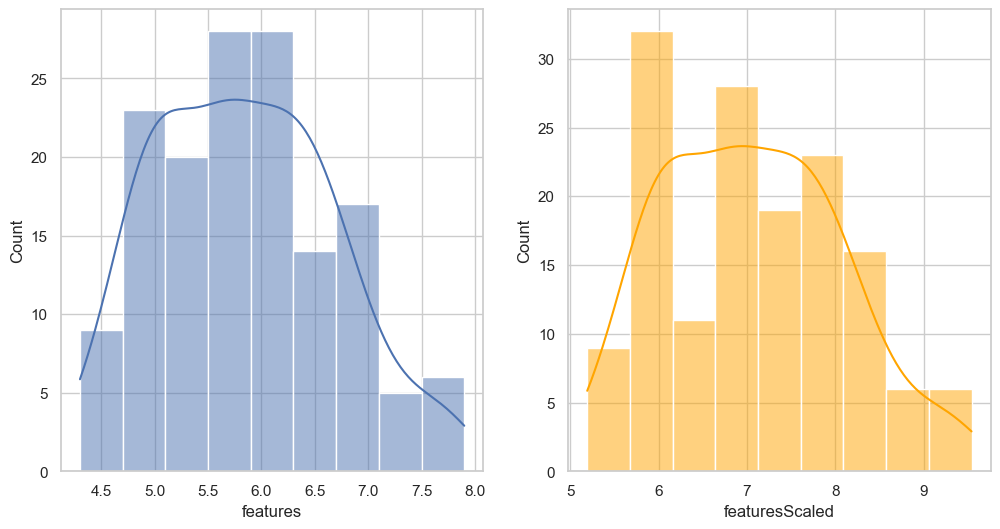

In [153]:
visualize_data(collect_data(standardized_data))


<font size = "13"><span style="color:#EFE1D1">
( ﾉ ﾟｰﾟ)ﾉ MinMaxScaler
</span></font>

In [162]:
from pyspark.ml.feature import MinMaxScaler

spark_iris_copy = reinit_data()

min_max_scaler = MinMaxScaler()\
    .setInputCol('features')\
    .setOutputCol('featuresScaled')

min_max_scaler_method = min_max_scaler.fit(spark_iris_copy)
min_max_scaler_data = min_max_scaler_method.transform(spark_iris_copy)
min_max_scaler_data.select('featuresScaled').show(truncate=False)

+----------------------+
|featuresScaled        |
+----------------------+
|[0.22222222222222213] |
|[0.1666666666666668]  |
|[0.11111111111111119] |
|[0.08333333333333327] |
|[0.19444444444444448] |
|[0.30555555555555564] |
|[0.08333333333333327] |
|[0.19444444444444448] |
|[0.027777777777777922]|
|[0.1666666666666668]  |
|[0.30555555555555564] |
|[0.13888888888888887] |
|[0.13888888888888887] |
|[0.0]                 |
|[0.41666666666666663] |
|[0.38888888888888895] |
|[0.30555555555555564] |
|[0.22222222222222213] |
|[0.38888888888888895] |
|[0.22222222222222213] |
+----------------------+
only showing top 20 rows



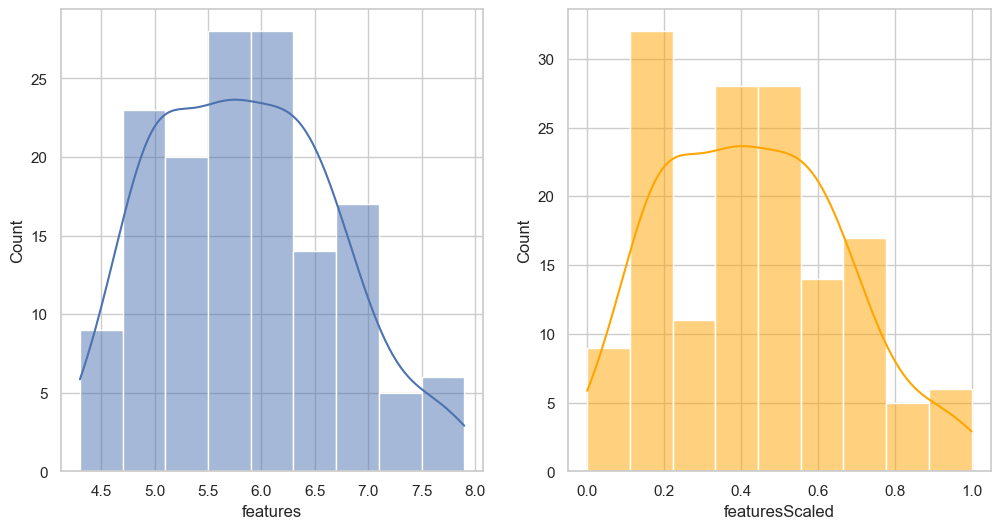

In [161]:
visualize_data(collect_data(min_max_scaler_data))


<font size = "13"><span style="color:#EFE1D1">
( ﾉ ﾟｰﾟ)ﾉ RobustScaler
</span></font>

In [163]:
from pyspark.ml.feature import RobustScaler

spark_iris_copy = reinit_data()

robust_scaler = RobustScaler()\
    .setInputCol('features')\
    .setOutputCol('featuresScaled')

robust_scaler_method = robust_scaler.fit(spark_iris_copy)
robust_scaler_data = robust_scaler_method.transform(spark_iris_copy)
robust_scaler_data.select('featuresScaled').show(truncate=False)

+--------------------+
|featuresScaled      |
+--------------------+
|[3.9230769230769207]|
|[3.7692307692307674]|
|[3.6153846153846136]|
|[3.5384615384615365]|
|[3.846153846153844] |
|[4.1538461538461515]|
|[3.5384615384615365]|
|[3.846153846153844] |
|[3.3846153846153832]|
|[3.7692307692307674]|
|[4.1538461538461515]|
|[3.6923076923076903]|
|[3.6923076923076903]|
|[3.3076923076923057]|
|[4.461538461538459] |
|[4.384615384615382] |
|[4.1538461538461515]|
|[3.9230769230769207]|
|[4.384615384615382] |
|[3.9230769230769207]|
+--------------------+
only showing top 20 rows



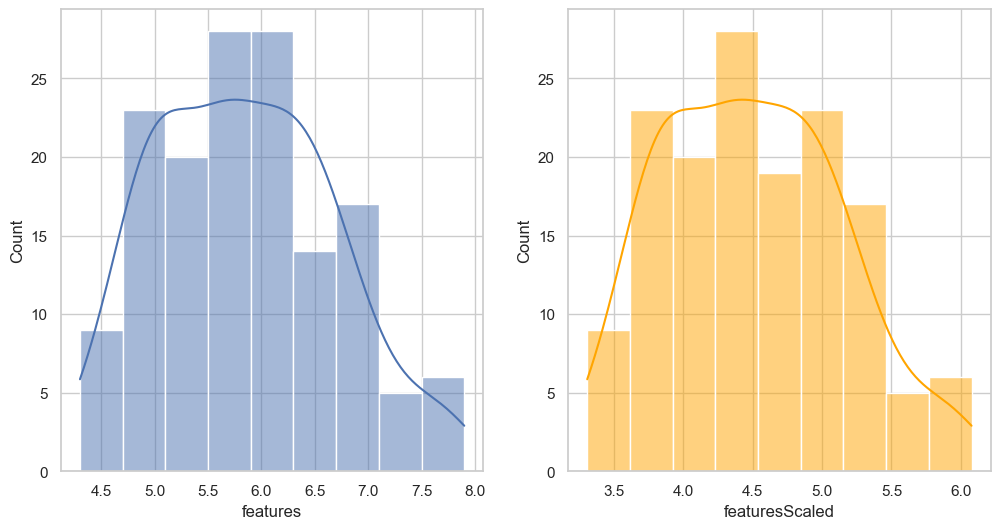

In [164]:
visualize_data(collect_data(robust_scaler_data))
